
### COMP 4447 DSTools1 Final Project
### Authors: Elizabeth Fugikawa & Heather Lemon

### How Online Dating and Dating App Usage Affect Relationships

The motivation behind this analysis is to further understand the dynamics of how online dating and cell phone dating app usage affect relationships using the data collected through [Standford's How Couples Meet and Stay Together (HCMST) 2017](https://data.stanford.edu/hcmst2017). As well as the study done in 2011 from [How Couples Meet and Stay Together 2011](https://data.stanford.edu/hcmst)

Some details of the data collected include; poltical affilation, mother's highest level of education, demographics, and if you met your sigificant other online or not.

We will looking at exploratory data analysis, feature engineering, cleaning, and visualization. Including basic transformations and normalizations of data.

### Detailed Notes Regarding Original Data Collection 2011

How Couples Meet and Stay Together (HCMST) is a study of how Americans meet their spouses and romantic partners.

The study is a nationally representative study of American adults.
<font color='red'>4,002 adults</font> responded to the survey, 3,009 of those had a spouse or main romantic partner.
The study oversamples self-identified gay, lesbian, and bisexual adults
Follow-up surveys were implemented one and two years after the main survey, to study couple dissolution rates. Version 3.0 of the dataset includes two follow-up surveys, waves 2 and 3.
Waves 4 and 5 are provided as separate data files that can be linked back to the main file via variable caseid_new.

### Detailed Notes Regarding the New Data Collection 2017
Administered by GFK group project report on behalf of the Standford Couples study.
This new survey, How Couples Meet and Stay Together 2017 (HCMST 2017), features a fresh set of <font color='red'>3,510 survey respondents</font>, with no overlap in subjects from the original HCMST survey which was first fielded in 2009.
HCMST 2017 features new questions about subjects' use of phone apps like Tinder and Grindr for dating and meeting partners.

Specifically, the purpose of this study is to bring knowledge of how couples meet up‐to‐date by
asking detailed questions about both the timing and the social contexts of how Americans meet
their romantic partners. Same‐sex couples have been oversampled both in order to provide
better information about the difficult‐to‐study sexual minority population, and in order to
provide new perspectives on the changing nature of same‐sex couple mating in the US.
Another key purpose is to examine how technology, specifically online dating and cell phone
apps like Tinder and Grindr, affect relationship formation, relationship quality, attachment to
the idea of monogamy, and relationship stability.

### Other work done this area 
Our work takes the basic features (demographics mostly) and keeps it simple without over architecting the main goal.

A couple of published papers
- https://web.stanford.edu/~mrosenfe/Rosenfeld_Tinder_and_dating_apps.pdf 
- https://web.stanford.edu/~mrosenfe/Rosenfeld_et_al_Disintermediating_Friends.pdf 

A couple of news articles written about the dataset 
- https://flowingdata.com/2019/03/19/the-relationship-timeline-continues-to-stretch/
- https://flowingdata.com/2019/03/15/shifts-in-how-couples-meet-online-takes-the-top-spot/


### Reference
Rosenfeld, Michael J., Reuben J. Thomas, and Sonia Hausen. 2019 How Couples Meet and Stay Together 2017 fresh sample. Stanford, CA: Stanford University Libraries.

## Table of Contents
> 0. [Importing Data](#Importing-Data)
> 1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * 1.0 [Read Stada](#Read-Stada) 
    * 1.1 [Feature Selection](#Feature-Selection)
> 2. [Introduction to Dataset](#Introduction-to-Dataset)
    * 2.0 [DataTypes](#DataTypes)
    * 2.1 [MAR (Missing data at Random)](#MAR-(Missing-data-at-Random)) 
    * 2.2 [One-Hot Encode](#One-Hot-Encode)
    * 2.3 [What month was most popular to meet your Significant Other?](#What-month-was-most-popular-to-meet-your-Significant-Other?)
    * 2.4 [Gender](#Gender)
    * 2.5 [Poltical](#Political)
    * 2.6 [Age](#Age)
    * 2.7 [Age Income](#Age-Income)
    * 2.8 [Bar Chart Race](#Bar-Chart-Race)
    * 1.5 [Visualizing the Data](#Visualization-of-Data)
         * 1.2.1 [Seaborn PairPlot](#Seaborn-Pairplot)
         * 1.2.2 [Correlation Table](#Correlation-Table)
    * 1.4 [Exploratory Data Analysis Conclusion](#Exploratory-Data-Analysis-Conclusion)
    

# Importing Data

In [1]:
%%bash
# pull data
wget 'https://stacks.stanford.edu/file/druid:hg921sg6829/HCMST_2017_public_data_v1.1_stata.zip'
unzip HCMST_2017_public_data_v1.1_stata.zip
# remove zipped file
rm HCMST_2017_public_data_v1.1_stata.zip
# rename file
mv 'HCMST 2017 fresh sample for public sharing draft v1.1.dta' HCMST2017.dta

Archive:  HCMST_2017_public_data_v1.1_stata.zip
  inflating: HCMST 2017 fresh sample for public sharing draft v1.1.dta  


--2022-11-06 18:51:47--  https://stacks.stanford.edu/file/druid:hg921sg6829/HCMST_2017_public_data_v1.1_stata.zip
Resolving stacks.stanford.edu (stacks.stanford.edu)... 171.67.37.91
Connecting to stacks.stanford.edu (stacks.stanford.edu)|171.67.37.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 463647 (453K) [application/zip]
Saving to: â€˜HCMST_2017_public_data_v1.1_stata.zipâ€™

     0K .......... .......... .......... .......... .......... 11%  377K 1s
    50K .......... .......... .......... .......... .......... 22%  679K 1s
   100K .......... .......... .......... .......... .......... 33% 1.35M 0s
   150K .......... .......... .......... .......... .......... 44% 1.23M 0s
   200K .......... .......... .......... .......... .......... 55%  874K 0s
   250K .......... .......... .......... .......... .......... 66% 1.05M 0s
   300K .......... .......... .......... .......... .......... 77% 7.15M 0s
   350K .......... .......... .......... .......... ...

In [2]:
%%bash
# pull data (2011)
wget 'https://stacks.stanford.edu/file/druid:ns183dp7831/HCMST_ver_3.04_Stata.zip'
unzip HCMST_ver_3.04_Stata.zip
# remove zipped file
rm HCMST_ver_3.04_Stata.zip
# file name is HCMST_ver_3.04_.dta

Archive:  HCMST_ver_3.04_Stata.zip
  inflating: HCMST_ver_3.04.dta      


--2022-11-06 18:51:48--  https://stacks.stanford.edu/file/druid:ns183dp7831/HCMST_ver_3.04_Stata.zip
Resolving stacks.stanford.edu (stacks.stanford.edu)... 171.67.37.91
Connecting to stacks.stanford.edu (stacks.stanford.edu)|171.67.37.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 452953 (442K) [application/zip]
Saving to: â€˜HCMST_ver_3.04_Stata.zipâ€™

     0K .......... .......... .......... .......... .......... 11%  903K 0s
    50K .......... .......... .......... .......... .......... 22% 1.29M 0s
   100K .......... .......... .......... .......... .......... 33% 1.13M 0s
   150K .......... .......... .......... .......... .......... 45% 4.09M 0s
   200K .......... .......... .......... .......... .......... 56% 1.06M 0s
   250K .......... .......... .......... .......... .......... 67% 2.01M 0s
   300K .......... .......... .......... .......... .......... 79% 1.69M 0s
   350K .......... .......... .......... .......... .......... 90% 1.33M 0s
   40

# Exploratory Data Analysis

We begin by importing the proper libraries and files

In [3]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy
import leafmap.foliumap as leafmap
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

# Read Stada

In [4]:
df2011 = pd.read_stata('HCMST_ver_3.04.dta')
df2011.head()

,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,pphouseholdsize,pphouse,ppincimp,hhinc,ppmarit,ppmsacat,ppreg4,ppreg9,pprent,ppt01,ppt1317,ppt18ov,ppt25,ppt612,children_in_hh,ppwork,ppnet,ppq14arace,pphispan,pprace_white,pprace_black,pprace_nativeamerican,pprace_asianindian,pprace_chinese,pprace_filipino,pprace_japanese,pprace_korean,pprace_vietnamese,pprace_otherasian,pprace_hawaiian,pprace_guamanian,pprace_samoan,pprace_otherpacificislander,pprace_someotherrace,papglb_friend,pppartyid3,papevangelical,papreligion,ppppcmdate_yrmo,pppadate_yrmo,pphhcomp11_member2_age,pphhcomp11_member3_age,pphhcomp11_member4_age,pphhcomp11_member5_age,pphhcomp11_member6_age,pphhcomp11_member7_age,pphhcomp11_member8_age,pphhcomp11_member9_age,pphhcomp11_member10_age,pphhcomp11_member11_age,pphhcomp11_member12_age,pphhcomp11_member13_age,pphhcomp11_member14_age,pphhcomp11_member15_age,pphhcomp11_member2_gender,pphhcomp11_member3_gender,pphhcomp11_member4_gender,pphhcomp11_member5_gender,pphhcomp11_member6_gender,pphhcomp11_member7_gender,pphhcomp11_member8_gender,pphhcomp11_member9_gender,pphhcomp11_member10_gender,pphhcomp11_member11_gender,pphhcomp11_member12_gender,pphhcomp11_member13_gender,pphhcomp11_member14_gender,pphhcomp11_member15_gender,pphhcomp11_member2_relationship,pphhcomp11_member3_relationship,pphhcomp11_member4_relationship,pphhcomp11_member5_relationship,pphhcomp11_member6_relationship,pphhcomp11_member7_relationship,pphhcomp11_member8_relationship,pphhcomp11_member9_relationship,pphhcomp11_member10_relationship,pphhcomp11_member11_relationship,pphhcomp11_member12_relationship,pphhcomp11_member13_relationship,pphhcomp11_member14_relationship,pphhcomp11_member15_relationship,irb_consent,weight3,weight4,weight5,weight6,weight7,weight_couples_coresident,HCMST_main_interview_yrmo,duration,qflag,glbstatus,papglb_status,recsource,s1,s1a,s2,q3_codes,q4,q5,q6a,q6b,q7a,q7b,q8a,q8b,q9,q10,q11,q12,q13a,q13b,q14,q15a1_compressed,q16,q17a,q17b,q17c,q17d,gender_attraction,q18a_1,q18a_2,q18a_3,q18a_refused,q18b_codes,q18c_codes,q19,q20,q21a,q21a_refusal,q21b,q21b_refusal,q21c,q21c_refusal,q21d,q21d_refusal,q21e,q21e_refusal,q22,q23,q24_codes,q25,q26,q27,q28,q29,q30,q31_1,q31_2,q31_3,q31_4,q31_5,q31_6,q31_7,q31_8,q31_9,q31_other_text_entered,q32,q33_1,q33_2,q33_3,q33_4,q33_5,q33_6,q33_7,q33_other_text_entered,q34,q35_codes,q35_text_entered,q24_met_online,summary_q24_total,q24_R_cowork,q24_R_friend,q24_R_family,q24_R_sig_other,q24_R_neighbor,q24_P_cowork,q24_P_friend,q24_P_family,q24_P_sig_other,q24_P_neighbor,q24_btwn_I_cowork,q24_btwn_I_friend,q24_btwn_I_family,q24_btwn_I_sig_other,q24_btwn_I_neighbor,q24_school,q24_college,q24_military,q24_church,q24_vol_org,q24_customer,q24_bar_restaurant,q24_internet_dating,q24_internet_social_networking,q24_internet_game,q24_internet_chat,q24_internet_community,q24_internet_other,q24_public,q24_private_party,q24_blind_date,q24_vacation,q24_singles_service_non_internet,q24_business_trip,q24_work_neighbor,q24_fam_sister_active,q24_fam_brother_active,q24_fam_mother_active,q24_fam_father_active,q24_fam_other_active,q24_fam_cousins_active,q24_fam_aunt_niece_active,q24_fam_uncle_nephew_active,q24_fam_grandmother_active,q24_fam_grandfather_active,q24_fam_sister_passive,q24_fam_brother_passive,q24_fam_mother_passive,q24_fam_father_passive,q24_fam_other_passive,q24_fam_cousins_passive,q24_fam_aunt_niece_passive,q24_fam_uncle_nephew_passive,q24_fam_grandmother_passive,q24_fam_grandfather_passive,q24_fam_female,q24_fam_male,distancemoved_10mi,marrynotreally,marrycountry,civilnotreally,partner_deceased,partner_religion_reclassified,partner_religion_child_reclass,own_religion_child_reclass,q32_internet,how_met_online,either_internet,either_internet_adjusted,same_sex_couple,potential_partner_gender_recodes,alt_partner_gender,how_long_ago_first_met,how_long_ago_first_romantic,how_long_ago_first_cohab,how_long_ago_first_met_cat,how_long_relationship,respondent_race,partner_rac

In [5]:
df2017 = pd.read_stata('HCMST2017.dta')
df2017.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,duration,speed_flag,consent,xlgb,S1,S2,S3,DOV_Branch,Q3_Refused,Q4,Q5,Q6A,Q6B,Q9,Q10,Q11,Q12,Q14,Q15A7,Q16,Q16_Refused,Q17A,Q17B,Q17C,Q17D,Q19,Q20,Q21A_Year,Q21A_Month,Q21B_Year,Q21B_Month,Q21C_Year,Q21C_Month,Q21D_Year,Q21D_Month,w6_identity,w6_outness,w6_outness_timing,Q23,Q24_Refused,Q25,Q26,Q27,Q28,w6_friend_connect_1,w6_friend_connect_2,w6_friend_connect_3,w6_friend_connect_4,w6_friend_connect_Refused,Q32,Q34,Q35_Refused,w6_sex_frequency,w6_otherdate,w6_how_many,w6_how_meet_Refused,w6_otherdate_app,w6_how_many_app,Past_Partner_Q1,w6_relationship_end_nonmar,w6_breakup_nonmar,w6_relationship_end_mar,w6_who_breakup,Q5_2,Q6A_2,Q9B_2,Q10_2,Q11_2,Q12_2,Q14_2,Q15A7_2_1,Q16_2,Q16_2_Codes,Q17B_2,Q17C_2,Q17D_2,Q20_2,Q21A_2_Year,Q21A_2_Month,Q21B_2_Year,Q21B_2_Month,Q21C_2_Year,Q21C_2_Month,Q21D_2_Year,Q21D_2_Month,Q21E_2_Year,Q21E_2_Month,Q21F_2_start_range,Q21F_2_Year,Q21F_2_Month,w6_identity_2,w6_outness_2,w6_outness_timing_2,Q23_2,Q25_2,Q26_2,Q27_2,Q28_2,w6_friend_connect_2_1,w6_friend_connect_2_2,w6_friend_connect_2_3,w6_friend_connect_2_4,w6_friend_connect_2_Refused,Q32_2,w6_otherdate_2,w6_how_many_2,w6_otherdate_app_2,w6_how_many_app_2,partyid7,PERSNET_hom,ppc10017,ppc21310,ppp20071,ppp20072,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,pphhsize,pphouse,ppincimp,ppmarit,ppmsacat,PPREG4,ppreg9,pprent,PPT01,PPT25,PPT612,PPT1317,PPT18OV,ppwork,Race_1,Race_2,Race_3,Race_4,Race_5,Race_6,race1,race2,race3,race4,race5,race6,race7,race8,race9,race10,race11,race12,race13,race14,race15,w6_took_the_survey,w6_prior_identity_lgb,w6_same_sex_couple,w6_same_sex_couple_gender,w6_q4,w6_q5,w6_q6a,w6_q6b,w6_q9,w6_q10,w6_q11,w6_q12,w6_q14,w6_q15a1_truncated,w6_q15a4_truncated,w6_q15a7,w6_q16,w6_q17,w6_attraction,w6_q19,w6_q20,w6_q21a_year,w6_q21a_month,w6_q21a_month_flag,w6_q21b_year,w6_q21b_month,w6_q21b_month_flag,w6_q21c_year,w6_q21c_month,w6_q21c_month_flag,w6_q21d_year,w6_q21d_month,w6_q21e_year,w6_q21e_month,w6_q21f_year,w6_q21f_month,w6_identity_all,w6_outness_all,w6_outness_timing_all,w6_q23,w6_q24_length,w6_q25,w6_q26,w6_q27,w6_q28,w6_friend_connect_1_all,w6_friend_connect_2_all,w6_friend_connect_3_all,w6_friend_connect_4_all,w6_q32,w6_q34,w6_otherdate_all,w6_how_many_all,w6_otherdate_app_all,w6_how_many_app_all,w6_number_people_met,w6_otherdate_dichotomous,w6_married,relate_duration_at_w6_years,w6_number_people_met_app,weight_combo_v2,partnership_status,female,year_fraction_met,year_fraction_relstart,age_when_met,time_from_met_to_rel,year_fraction_first_cohab,time_from_rel_to_cohab,hcm2017q24_R_cowork,hcm2017q24_R_friend,hcm2017q24_R_family,hcm2017q24_R_sig_other,hcm2017q24_R_neighbor,hcm2017q24_P_cowork,hcm2017q24_P_friend,hcm2017q24_P_family,hcm2017q24_P_sig_other,hcm2017q24_P_neighbor,hcm2017q24_btwn_I_cowork,hcm2017q24_btwn_I_friend,hcm2017q24_btwn_I_family,hcm2017q24_btwn_I_sig_other,hcm2017q24_btwn_I_neighbor,hcm2017q24_school,hcm2017q24_college,hcm2017q24_mil,hcm2017q24_church,hcm2017q24_vol_org,hcm2017q24_customer,hcm2017q24_bar_restaurant,hcm2017q24_party,hcm2017q24_internet_other,hcm2017q24_internet_dating,hcm2017q24_internet_soc_network,hcm2017q24_internet_game,hcm2017q24_internet_chat,hcm2017q24_internet_org,hcm2017q24_public,hcm2017q24_blind_date,hcm2017q24_vacation,hcm2017q24_single_serve_nonint,hcm2017q24_business_trip,hcm2017q24_work_neighbors,hcm2017q24_met_online,hcm2017_q24_length,hcm2017q24_summary_all_codes,w6_relationship_quality,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,9,Completed survey in over 2 minutes,"Yes, I agree to participate",LGB sample,"No, I am not Married","No, I am single, with no boyfriend, no girlfri...",Yes,2,NaN,NaN,NaN,

# Feature Selection

In [6]:
df2011.shape

(4002, 387)

In [7]:
df2017.shape

(3510, 285)

The first column is total number of respondants and the second column is the number of columns of the dataset. 

In [8]:
df_numeric2011 = pd.DataFrame()
df_numeric_encoded2011 = pd.DataFrame()
df_categorical2011 = pd.DataFrame()
df_categorical_encoded2011 = pd.DataFrame()

# Divide data into numeric or categorical responses
df_numeric2011 = df2011[['caseid_new', 'ppage', 'ppagecat', 'hhinc']].rename\
    ({'caseid_new': 'id', 'ppage': 'age', 'ppagecat': 'cat_age'}, axis=1)

df_categorical2011 = df2011[['ppgender', 'ppeducat', 'ppincimp',
                               'ppwork', 'pppartyid3', 'ppreg9',
                               'ppmarit', 'q24_met_online',
                               'papreligion', 'relationship_quality']].rename(
            columns={'ppgender': 'gender',
                     'ppeducat': 'educ',
                     'ppincimp': "incomecat",
                     'ppwork': 'job_status',
                     'pppartyid3': 'political_aff',
                     'ppreg9': 'region',
                     'papreligion': 'religion',
                     'w6_otherdate_app_2': 'app_used',
                     'ppmarit': 'marital_status',
                     'q24_met_online': 'met_online'})

print(df_numeric2011.head())
print(df_categorical2011.head())

      id age cat_age    hhinc
0  22526  52   45-54  22250.0
1  23286  28   25-34  45000.0
2  25495  49   45-54  37250.0
3  26315  31   25-34  45000.0
4  27355  35   35-44  45000.0
   gender                         educ           incomecat  \
0  female  bachelor's degree or higher  $20,000 to $24,999   
1  female  bachelor's degree or higher  $40,000 to $49,999   
2  female                  high school  $35,000 to $39,999   
3    male                 some college  $40,000 to $49,999   
4    male                  high school  $40,000 to $49,999   

                     job_status political_aff              region  \
0  working - as a paid employee      democrat  east-north central   
1  working - as a paid employee      democrat             pacific   
2  working - as a paid employee      democrat  west-south central   
3  working - as a paid employee      democrat      south atlantic   
4       working - self-employed      democrat      south atlantic   

        marital_status   met_onl

In [9]:
df_numeric2017 = pd.DataFrame()
df_numeric_encoded2017 = pd.DataFrame()
df_categorical2017 = pd.DataFrame()
df_categorical_encoded2017 = pd.DataFrame()

# Divide data into numeric or categorical responses
df_numeric2017 = df2017[['ppage', 'ppagecat', 'w6_q21a_month', 'CaseID']].rename\
    ({'ppage': 'age', 'ppagecat': 'cat_age', 'w6_q21a_month': 'month_met', 'CaseID': 'id'}, axis=1)

df_categorical2017 = df2017[['ppgender', 'ppeducat', 'ppincimp',
                               'ppwork', 'partyid7', 'PPREG4',
                               'ppmarit', 'hcm2017q24_met_online',
                               'w6_relationship_quality', ]].rename(
            columns={'ppgender': 'gender',
                     'ppeducat': 'educ',
                     'ppincimp': "incomecat",
                     'ppwork': 'job_status',
                     'partyid7': 'political_aff',
                     'PPREG4': 'region',
                     'w6_otherdate_app_2': 'app_used',
                     'ppmarit': 'marital_status',
                     'hcm2017q24_met_online': 'met_online', 
                     })

print(df_numeric2017.head())
print(df_categorical2017.head())

  age cat_age  month_met  id
0  30   25-34      March   2
1  55   55-64        May   3
2  47   45-54    January   5
3  28   25-34      March   6
4  59   55-64  September   7
   gender                         educ             incomecat  \
0    Male                 Some college    $40,000 to $49,999   
1  Female  Bachelor's degree or higher  $150,000 to $174,999   
2    Male  Bachelor's degree or higher  $200,000 to $249,999   
3  Female        Less than high school    $40,000 to $49,999   
4  Female  Bachelor's degree or higher  $175,000 to $199,999   

                     job_status          political_aff     region  \
0  Working - as a paid employee         Leans Democrat  Northeast   
1           Not working - other  Not Strong Republican    Midwest   
2  Working - as a paid employee         Leans Democrat      South   
3           Not working - other        Strong Democrat    Midwest   
4  Working - as a paid employee        Strong Democrat      South   

  marital_status met_onlin

# Introduction to Dataset

### DataTypes

2011 datatype check

In [10]:
print(df_numeric2011.dtypes)
print(df_categorical2011.dtypes)

id            int32
age        category
cat_age    category
hhinc       float32
dtype: object
gender                  category
educ                    category
incomecat               category
job_status              category
political_aff           category
region                  category
marital_status          category
met_online              category
religion                category
relationship_quality    category
dtype: object


2017 datatype check

In [11]:
print(df_numeric2017.dtypes)
print(df_categorical2017.dtypes)

age          category
cat_age      category
month_met    category
id              int16
dtype: object
gender                     category
educ                       category
incomecat                  category
job_status                 category
political_aff              category
region                     category
marital_status             category
met_online                 category
w6_relationship_quality    category
dtype: object


### Null Check For 2011 data

In [12]:
print(df_categorical2011.isnull().sum())
print(df_numeric2011.isnull().sum())

gender                     0
educ                       0
incomecat                  0
job_status                 0
political_aff              0
region                     0
marital_status             0
met_online              1068
religion                  15
relationship_quality    1006
dtype: int64
id         0
age        0
cat_age    0
hhinc      0
dtype: int64


### Null Check for 2017 data 

In [13]:
print(df_categorical2017.isnull().sum())
print(df_numeric2017.isnull().sum())

gender                       0
educ                         0
incomecat                    0
job_status                   0
political_aff              116
region                       0
marital_status               0
met_online                 116
w6_relationship_quality    663
dtype: int64
age            0
cat_age        0
month_met    160
id             0
dtype: int64


# MAR (Missing data at Random)

We do have a few features with missing data. How to deal with it?

# One-Hot Encode

In [14]:
df_numeric2011['hhinc'] = df_numeric2011['hhinc'].astype(int)
df_numeric_encoded2011 = pd.get_dummies(df_numeric2011)
df_categorical_encoded2011 = pd.get_dummies(df_categorical2011)
print(df_categorical_encoded2011.head(3))
print(df_numeric_encoded2011.head(3))

   gender_male  gender_female  educ_less than high school  educ_high school  \
0            0              1                           0                 0   
1            0              1                           0                 0   
2            0              1                           0                 1   

   educ_some college  educ_bachelor's degree or higher  \
0                  0                                 1   
1                  0                                 1   
2                  0                                 0   

   incomecat_less than $5,000  incomecat_$5,000 to $7,499  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   incomecat_$7,500 to $9,999  incomecat_$10,000 to $12,499  \
0                           0                             0   
1                           0                             0   
2               

      id  hhinc  age_19  age_20  age_21  age_22  age_23  age_24  age_25  \
0  22526  22250       0       0       0       0       0       0       0   
1  23286  45000       0       0       0       0       0       0       0   
2  25495  37250       0       0       0       0       0       0       0   

   age_26  age_27  age_28  age_29  age_30  age_31  age_32  age_33  age_34  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       1       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   

   age_35  age_36  age_37  age_38  age_39  age_40  age_41  age_42  age_43  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   

   age_44  age_45  age_46  age_47  age_48  age_49  age_50  age_51  age_52  \
0   

# What month was most popular to meet your Significant Other? 

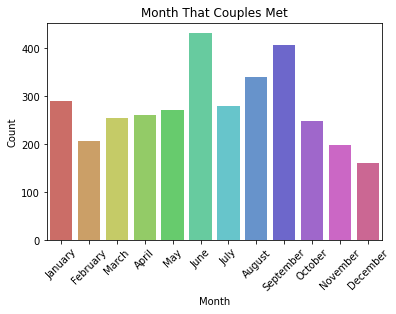

In [15]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
counts = []
for m in months:
    count = df_numeric2017['month_met'].value_counts()[m]
    counts.append(count)
month_df = pd.DataFrame({'month': months, 'count': counts})
p = sns.barplot(x='month', y='count', data=month_df, palette='hls')
p.set(xlabel='Month', ylabel='Count', title='Month That Couples Met')
p.tick_params(axis='x', rotation=45)
plt.show()

In [16]:
big_df = pd.concat([df_numeric2011, df_categorical2011], axis=1)
t1 = big_df.pivot_table(values=["hhinc"], index=["region"], aggfunc=np.mean)
t2 = big_df.pivot_table(values=["id"], index=["marital_status", "met_online"], aggfunc='count')
t3 = big_df.pivot_table(values=["id"], index=["political_aff", "cat_age"], aggfunc='count')

# Gender 

<AxesSubplot:xlabel='gender', ylabel='count'>

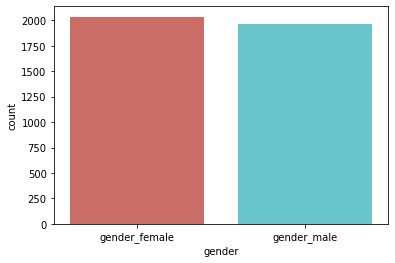

In [17]:
# Visualize gender representative
female_count = df_categorical_encoded2011['gender_female'].value_counts()[1]
male_count = df_categorical_encoded2011['gender_male'].value_counts()[1]
gender = pd.DataFrame({'gender': ['gender_female', 'gender_male'], 'count': [female_count, male_count]})
sns.barplot(x='gender', y='count', data=gender, palette='hls')

# Political 

Text(0.5, 1.0, 'Political Party Affiliation Representation')

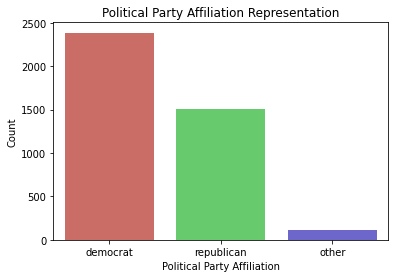

In [18]:
# Visualize political representative
democrat_count = df_categorical_encoded2011['political_aff_democrat'].value_counts()[1]
republican_count = df_categorical_encoded2011['political_aff_republican'].value_counts()[1]
other_count = df_categorical_encoded2011['political_aff_other'].value_counts()[1]
party_aff = pd.DataFrame({'political_party': ['democrat', 'republican', 'other'],
                          'count': [democrat_count, republican_count, other_count]})
sns.barplot(x='political_party', y='count', data=party_aff, palette="hls")
plt.xlabel('Political Party Affiliation')
plt.ylabel('Count')
plt.title('Political Party Affiliation Representation')

# Age

In [24]:
age_col_df = df_numeric_encoded2011.iloc[2:, :10]
print(age_col_df)
# age_col_df.drop(labels='id', axis=1, inplace=True)
# age_col_df.drop(labels='age', axis=1, inplace=True)
# age_col_df.drop(labels='hhinc', axis=1, inplace=True)
# count_df = pd.DataFrame({'count': age_col_df.sum()})
# count_df.rename(index={'cat_age_18-24': '18-24', 'cat_age_25-34': '25-34',
#                        'cat_age_35-44': '35-44', 'cat_age_45-54': '45-54',
#                        'cat_age_55-64': '55-64', 'cat_age_65-74': '65-74',
#                        'cat_age_75+': '75+'}, inplace=True)
# count_df.reset_index(inplace=True)
# count_df.rename(columns={'index': 'age'}, inplace=True)
# sns.barplot(x='age', y='count', data=count_df, palette='hls')

           id   hhinc  age_19  age_20  age_21  age_22  age_23  age_24  age_25  \
2       25495   37250       0       0       0       0       0       0       0   
3       26315   45000       0       0       0       0       0       0       0   
4       27355   45000       0       0       0       0       0       0       0   
5       27695   27250       0       0       0       0       0       0       0   
6       28536  137250       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
3997  4623505   80000       0       0       0       0       0       0       0   
3998  4625902   55000       0       0       0       0       0       0       0   
3999  4626536  162250       0       0       0       0       0       0       0   
4000  4627251   67250       0       0       0       0       0       0       1   
4001  4628251   80000       0       0       0       0       0       0       1   

      age_26  
2          0

# Age Income

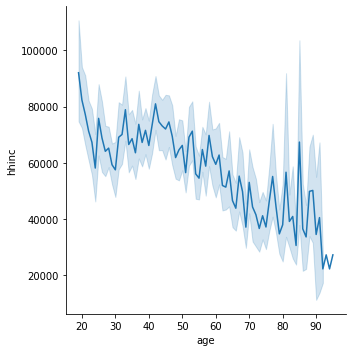

In [25]:
sns.relplot(x='age', y='hhinc', kind='line', data=df_numeric2011)

In [26]:
model = sm.OLS(df_categorical_encoded2011['met_online_met offline'], df_numeric2011['hhinc'])
results = model.fit()
print(results.params)
print(results.summary())

hhinc    0.000008
dtype: float64
                                   OLS Regression Results                                  
Dep. Variable:     met_online_met offline   R-squared (uncentered):                 -10.736
Model:                                OLS   Adj. R-squared (uncentered):            -10.739
Method:                     Least Squares   F-statistic:                             -3660.
Date:                    Sun, 06 Nov 2022   Prob (F-statistic):                        1.00
Time:                            19:01:14   Log-Likelihood:                         -3302.4
No. Observations:                    4002   AIC:                                      6607.
Df Residuals:                        4001   BIC:                                      6613.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t    

In [27]:
np.random.seed(1)
print(scipy.stats.shapiro(df_categorical_encoded2011['political_aff_democrat']))
print(scipy.stats.shapiro(df_categorical_encoded2011['political_aff_republican']))
print(scipy.stats.shapiro(df_categorical_encoded2011['political_aff_other'].sample(n=500)))

ShapiroResult(statistic=0.623072624206543, pvalue=0.0)
ShapiroResult(statistic=0.6139096021652222, pvalue=0.0)
ShapiroResult(statistic=0.19334465265274048, pvalue=1.1784920084971712e-41)


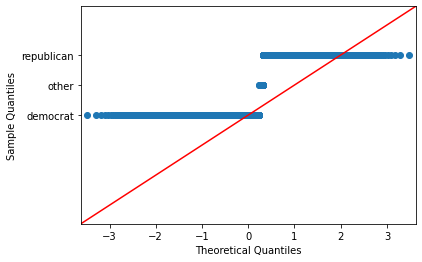

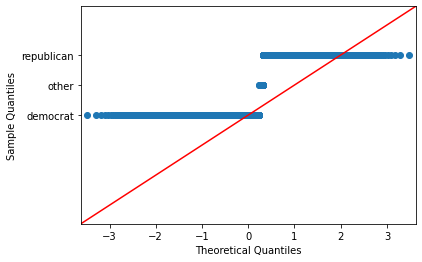

In [28]:
sm.qqplot(data=df_categorical2011['political_aff'], line='45')

In [29]:
m = leafmap.Map(center=(40, -100), zoom=4)
m


"# TODO explain missing data at random, and how we deal with it\n",
"# other interesting question - look at region vs marital status and/or political party?\n",


# Bar Chart Race

In [39]:
#!pip install bar-chart-race

import bar_chart_race as bcr 

how_couples_met_2017 = df2017.loc[:, 'hcm2017q24_R_cowork':'hcm2017q24_met_online']
year = df2017['Q21A_Year']
year = year.rename('year')
how_couples_met_2017 = how_couples_met_2017.merge(year, left_index=True, right_index=True)
how_couples_met_2017.dropna(inplace=True)
how_couples_met_2017 = how_couples_met_2017.set_index('year')
how_couples_met_2017 = how_couples_met_2017.sort_index()
how_couples_met_2017 = how_couples_met_2017.drop(index=['Refused'], axis=0)
how_couples_met_2017.index = pd.to_datetime(how_couples_met_2017.index).year


In [40]:
how_couples_met_2017 = how_couples_met_2017.rename(columns={'hcm2017q24_R_cowork':'Respondents coworker', 'hcm2017q24_R_friend':'Respondents friend', 'hcm2017q24_R_family':'Respondents Family',
       'hcm2017q24_R_sig_other':'Respondents Significant Other',
       'hcm2017q24_R_neighbor': 'Respondents residential neighbor',
       'hcm2017q24_P_cowork': 'Partners coworker',
       'hcm2017q24_P_friend': 'Partners friend',
       'hcm2017q24_P_family': 'Partners family',
       'hcm2017q24_P_sig_other': 'Partners Significant Other',
       'hcm2017q24_P_neighbor': 'Partners Neighbor',
       'hcm2017q24_btwn_I_cowork': 'coworker relationship between intermediaries',
       'hcm2017q24_btwn_I_friend': 'friendship between intermediaries',
       'hcm2017q24_btwn_I_family': 'friendship between family',
       'hcm2017q24_btwn_I_sig_other': 'friendship between sign other',
       'hcm2017q24_btwn_I_neighbor': 'intermediaries are neighbors',
       'hcm2017q24_school' : 'met in primary or secondary school',
       'hcm2017q24_college': 'met in college',
       'hcm2017q24_mil': 'met during military service',
       'hcm2017q24_church': 'met in or through church or religious organization',
       'hcm2017q24_vol_org': 'met through voluntary organization',
       'hcm2017q24_customer': 'customer-client relationship',
       'hcm2017q24_bar_restaurant': 'bar, restaurant, public social gathering place',
       'hcm2017q24_party': 'private party',
       'hcm2017q24_internet_other': 'Internet',
       'hcm2017q24_internet_dating': 'met through Internet dating or phone app',
       'hcm2017q24_internet_soc_network': 'met through internet social networking',
       'hcm2017q24_internet_game': 'met through online gaming',
       'hcm2017q24_internet_chat': 'met through Internet chat',
       'hcm2017q24_internet_org': 'met through Internet site not mainly dedicated to dating',
       'hcm2017q24_public': 'met in public place',
       'hcm2017q24_blind_date': 'met on blind date',
       'hcm2017q24_vacation': 'met while on vacation',
       'hcm2017q24_single_serve_nonint': 'non internet single service',
       'hcm2017q24_business_trip': 'met while on business trip',
       'hcm2017q24_work_neighbors': 'met as work neighbors',
       'hcm2017q24_met_online': 'met online, all kinds'})

In [41]:
how_couples_met_2017 = pd.get_dummies(how_couples_met_2017)
how_couples_met_2017 = how_couples_met_2017[how_couples_met_2017.columns.drop(list(how_couples_met_2017.filter(regex='_no')))]
# groupby every 5 years
how_couples_met_2017 = how_couples_met_2017.groupby((how_couples_met_2017.index//5)*5).sum()
how_couples_met_2017.columns = how_couples_met_2017.columns.str.replace('_yes', '')
how_couples_met_2017.head(3)

,Respondents coworker,Respondents friend,Respondents Family,Respondents Significant Other,Respondents residential neighbor,Partners coworker,Partners friend,Partners family,Partners Significant Other,Partners Neighbor,coworker relationship between intermediaries,friendship between intermediaries,friendship between family,friendship between sign other,intermediaries are neighbors,met in primary or secondary school,met in college,met during military service,met in or through church or religious organization,met through voluntary organization,customer-client relationship,"bar, restaurant, public social gathering place",private party,Internet,met through Internet dating or phone app,met through internet social networking,met through online gaming,met through Internet chat,met through Internet site not mainly dedicated to dating,met in public place,met on blind date,met while on vacation,non internet single service,met while on business trip,met as work neighbors,"met online, all kinds"
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1935,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1945,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1950,0,7,3,1,3,0,6,3,1,4,0,0,0,1,0,3,2,2,2,1,0,3,1,0,0,0,0,0,0,1,1,1,0,0,0,0


In [42]:
how_couples_met_2017.index = pd.to_datetime(how_couples_met_2017.index, format='%Y')
how_couples_met_2017.index

DatetimeIndex(['1935-01-01', '1945-01-01', '1950-01-01', '1955-01-01',
               '1960-01-01', '1965-01-01', '1970-01-01', '1975-01-01',
               '1980-01-01', '1985-01-01', '1990-01-01', '1995-01-01',
               '2000-01-01', '2005-01-01', '2010-01-01', '2015-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

In [43]:
bcr.bar_chart_race(df=how_couples_met_2017, sort='desc',
                   orientation='h', steps_per_period=65, period_length=1000,
                   bar_size=1, dpi=200,
                   label_bars=True,
                   bar_label_size=7,
                   tick_label_size=7,
                   n_bars=10,
                   fixed_max=True,
                   title='How Couples Met (1938-2017)',
                   period_label={'x': .99, 'y': .1, 'ha': 'right', 'color': 'red'},
                   period_fmt='%Y',
                   filename=None)